In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
#sal_all = pd.DataFrame.from_csv('Salaries.csv')
sal_all = pd.read_table('Salaries.csv', sep=r',', skipinitialspace=True)
sal_all.head()
sal_all.shape

C:\Users\Vibhav\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(148654, 13)

In [3]:
sal_all.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [55]:

sal_info = sal_all[sal_all.BasePay>1000]

sal_info.loc[:,'EmployeeName'] = sal_info.loc[:,'EmployeeName'].str.upper().str.replace('  ',' ')
#sal_info.loc[:,'EmployeeName'] = sal_info.loc[:,'EmployeeName']
sal_info.loc[:,'JobTitle'] = sal_info.loc[:,'JobTitle'].str.upper().str.replace('  ',' ')
sal_info = sal_info[sal_info.EmployeeName != 'NOT PROVIDED']

In [16]:
s1 = sal_info.groupby(['Year','EmployeeName']).TotalPayBenefits.mean().unstack('Year').fillna(0)
s1

Year,2011,2012,2013,2014
EmployeeName,,,,
A BERNARD FATOOH,20039.910,23514.85,29379.24,30153.03
A ELIZABETH MARCHASIN,26282.860,0.00,0.00,0.00
A JAMIL NIAZI,87496.210,0.00,0.00,0.00
A K FINIZIO,0.000,0.00,0.00,26113.37
A. JAMES ROBERTSON II,19473.920,22711.70,22601.80,0.00
A.K. FINIZIO,0.000,0.00,13901.57,0.00
AALIYAH HOGUE,0.000,2706.32,0.00,0.00
AALIYAH JAVAE'MERCEDES O'NEAL,0.000,0.00,0.00,2622.32
AALIYAH V HOGUE,0.000,0.00,51131.48,21071.20


In [28]:
s2 = sal_info.groupby(['Year','EmployeeName']).TotalPay.mean().unstack('Year').fillna(0)
s2

Year,2011,2012,2013,2014
EmployeeName,,,,
A BERNARD FATOOH,20039.910,18500.19,23923.62,24061.35
A ELIZABETH MARCHASIN,26282.860,0.00,0.00,0.00
A JAMIL NIAZI,87496.210,0.00,0.00,0.00
A K FINIZIO,0.000,0.00,0.00,25854.81
A. JAMES ROBERTSON II,19473.920,22065.71,22601.80,0.00
A.K. FINIZIO,0.000,0.00,13763.93,0.00
AALIYAH HOGUE,0.000,2493.61,0.00,0.00
AALIYAH JAVAE'MERCEDES O'NEAL,0.000,0.00,0.00,2596.36
AALIYAH V HOGUE,0.000,0.00,33271.68,13443.73


In [18]:
s1.iloc[1]

Year
2011    26282.86
2012        0.00
2013        0.00
2014        0.00
Name: A ELIZABETH MARCHASIN, dtype: float64

In [19]:
s3 = sal_info.groupby(['Year','JobTitle']).TotalPay.mean().unstack('Year').fillna(0)
s3

Year,2011,2012,2013,2014
JobTitle,,,,
ACCOUNT CLERK,44035.664337,46066.717765,46133.322414,37681.233226
ACCOUNTANT,58999.485000,0.000000,0.000000,0.000000
ACCOUNTANT I,0.000000,66632.716667,68527.130000,45404.635000
ACCOUNTANT II,0.000000,63847.613056,69785.547403,68204.682078
ACCOUNTANT III,0.000000,78904.527241,81097.447865,79528.228586
ACCOUNTANT INTERN,29031.742917,53213.213600,46179.613913,21808.904545
ACCOUNTANT IV,0.000000,88362.906415,96540.957818,95769.448387
"ACPO,JUVP, JUV PROB (SFERS)",0.000000,0.000000,0.000000,62290.780000
ACUPUNCTURIST,67594.400000,71748.500000,76851.000000,79495.000000


In [20]:
y1_title= s3.loc[:,2011].sort_values(ascending=False)

In [21]:
y2_title= s3.loc[:,2012].sort_values(ascending=False)
y3_title= s3.loc[:,2013].sort_values(ascending=False)
y4_title= s3.loc[:,2014].sort_values(ascending=False)

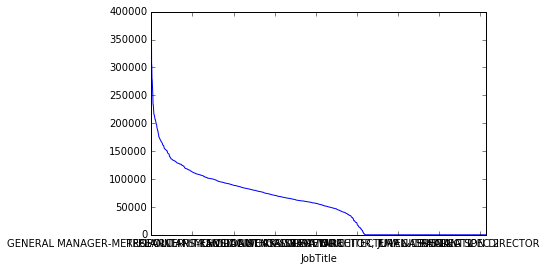

In [22]:
y1_title.plot()

In [23]:
s3.loc[:,2014].sort_values(ascending=False).head(10)

JobTitle
CHIEF INVESTMENT OFFICER        339653.700000
CHIEF OF POLICE                 326716.760000
CHIEF, FIRE DEPARTMENT          326233.440000
GEN MGR, PUBLIC TRNSP DEPT      294000.180000
DEP CHF OF DEPT (FIRE DEPT)     285575.785000
DEPUTY CHIEF 3                  282918.775000
ADMINISTRATOR, DPH              282619.960000
MAYOR                           281537.170000
ASST CHF OF DEPT (FIRE DEPT)    279768.958333
DEPT HEAD V                     279408.864000
Name: 2014, dtype: float64

In [32]:
s1=sal_info.groupby(['Year','TotalPay']).size()


In [90]:
s1.head()

Year  TotalPay
2011  108.75      1
      111.56      1
      115.05      1
      117.68      1
      120.00      1
dtype: int64

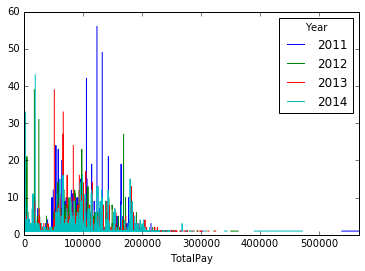

In [72]:
s1.unstack('Year').plot()

In [70]:
names = sal_info['EmployeeName'].str.split()
sal_info['EmployeeFN'] = names.str[0]

In [77]:
def split_fname(full_name):
    names = full_name.split()
    if len(names[0]) == 1 and len(names)>2:
        fname = names[1]
    else:
        fname = names[0]
    return fname

In [78]:
sal_info['EmployeeFN_2'] = sal_info['EmployeeName'].apply(split_fname)

In [79]:
sal_info[sal_info.EmployeeFN_2>sal_info.EmployeeFN ].head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,EmployeeFN,EmployeeFN_2
1260,1261,J MICHAEL SWART,ATTORNEY (CIVIL/CRIMINAL),164353,0,0,NaN,164352.66,164352.66,2011,NaN,San Francisco,NaN,J,MICHAEL
5104,5105,K P KASHIMA,FIREFIGHTER,105676,3279.64,14568.2,NaN,123524.06,123524.06,2011,NaN,San Francisco,NaN,K,P
6050,6051,J JAMIE ONGPIN,POLICE OFFICER III,112381,2501.34,3615.23,NaN,118497.28,118497.28,2011,NaN,San Francisco,NaN,J,JAMIE
8522,8523,F GABRIEL PEREZ,POLICE OFFICER I,96537.6,2525.79,5845.57,NaN,104908.91,104908.91,2011,NaN,San Francisco,NaN,F,GABRIEL
12418,12419,A JAMIL NIAZI,IS ENGINEER - PRINCIPAL,69058.2,0,18438,NaN,87496.21,87496.21,2011,NaN,San Francisco,NaN,A,JAMIL
14147,14148,P RORRIE TINIAKOFF,DEPUTY PROBATION OFFICER,80993.4,0,0,NaN,80993.42,80993.42,2011,NaN,San Francisco,NaN,P,RORRIE
15592,15593,C CHANDLER WHITE-JR,WORKER'S COMPENSATION ADJUSTER,75005.7,0,624,NaN,75629.67,75629.67,2011,NaN,San Francisco,NaN,C,CHANDLER
19129,19130,B JENNY ROGERS,RECREATION SUPERVISOR,64065.4,0,1722.49,NaN,65787.85,65787.85,2011,NaN,San Francisco,NaN,B,JENNY
24670,24671,C MONICA FABIANO,TELEPHONE OPERATOR,45797.2,3882.63,430.31,NaN,50110.17,50110.17,2011,NaN,San Francisco,NaN,C,MONICA
28469,28470,A ELIZABETH MARCHASIN,PRINCIPAL CLERK,23591.8,0,2691.06,NaN,26282.86,26282.86,2011,NaN,San Francisco,NaN,A,ELIZABETH


In [95]:
from nltk import NaiveBayesClassifier,classify
import USSSALoader
import random

class genderPredictor():
    
    def __init__(self,name='Sam'):
        self.name = name
        
    def getFeatures(self):
        maleNames,femaleNames=self._loadNames()
        
        featureset = list()
        
        for nameTuple in maleNames:
            features = self._nameFeatures(nameTuple[0])
            male_prob, female_prob = self._getProbDistr(nameTuple)
            features['male_prob'] = male_prob
            features['female_prob'] = female_prob
            featureset.append((features,'M'))
        
        for nameTuple in femaleNames:
            features = self._nameFeatures(nameTuple[0])
            male_prob, female_prob = self._getProbDistr(nameTuple)
            features['male_prob'] = male_prob
            features['female_prob'] = female_prob
            featureset.append((features,'F'))
    
        return featureset
    
    def trainAndTest(self,trainingPercent=0.80):
        featureset = self.getFeatures()
        random.shuffle(featureset)
        
        name_count = len(featureset)
        
        cut_point=int(name_count*trainingPercent)
        
        train_set = featureset[:cut_point]
        test_set  = featureset[cut_point:]
        
        self.train(train_set)
        
        return self.test(test_set)
        
    def classify(self):
        feats=self._nameFeatures(self.name)
        return self.classifier.classify(feats)
        
    def train(self,train_set):
        self.classifier = NaiveBayesClassifier.train(train_set)
        return self.classifier
        
    def test(self,test_set):
        return classify.accuracy(self.classifier,test_set)
    
    def _getProbDistr(self,nameTuple):
            male_prob = (nameTuple[1] * 1.0) / (nameTuple[1] + nameTuple[2])
            if male_prob == 1.0:
                male_prob = 0.99
            elif male_prob == 0.0:
                male_prob = 0.01
            else:
                pass
            female_prob = 1.0 - male_prob
            return (male_prob, female_prob)
        
    def getMostInformativeFeatures(self,n=5):
        return self.classifier.most_informative_features(n)
        
    def _loadNames(self):
        return USSSALoader.getNameList()
        
    def _nameFeatures(self):
        name=self.name.upper()
        return {
            'last_letter': name[-1],
            'last_two' : name[-2:],
            'last_three': name[-3:],
            'last_is_vowel' : (name[-1] in 'AEIOUY')
        }


In [99]:
gp = genderPredictor()
#gp.name
gp.trainAndTest()
#gp.getMostInformativeFeatures(10)
#gp.classify('Nick')

names.pickle exists, loading data
names.pickle loaded
32031 male names loaded, 56347 female names loaded


TypeError: _nameFeatures() takes exactly 1 argument (2 given)